In [1]:
import sys
sys.path.insert(0, "../../src/")
from framework import *
from algorithms import pso

# convert the float number to latex format
def float_to_latex(float_number):
    import math
    if float('inf') == float_number:
        return "\\( +\\infty \\)"
    # Extracting the exponent part
    exponent = int(math.floor(math.log10(abs(float_number))))

    # Extracting the mantissa part
    mantissa = float_number / (10 ** exponent)

    # Formatting the float number in the LaTeX style format
    latex_formatted_number = "\\({:.2f} \\times 10^{{{}}}\\)".format(mantissa, exponent)
    return latex_formatted_number

def params_to_latex(ins, int_fields=[]):
    d = ins.trial.params
    for k, v in d.items():
        kk = k.replace('_', '\\_')
        if k in int_fields:
            print(f'& \\texttt{{{kk}}} & {v} \\\\')
        else:
            print(f'& \\texttt{{{kk}}} & {float_to_latex(v)} \\\\')

def performance_to_latex(ins):
    run_num = len(ins.results)
    d = ins.performance_measures()
    sr = d['success_rate']
    ah = d['avg_height']
    ert = d['ert']
    gert = d['gary_ert']
    print(ins.algorithm.name.replace('_', ' '), end='\t')
    print(f'& {run_num}', end='\t')
    print(f'& {round(sr * 100)}\\%', end='\t')
    print(f'& {round(ah)}', end='\t')
    print(f'& {float_to_latex(ert)} ', end='\t')
    print(f'& {float_to_latex(gert)} ', end='\\\\')

In [2]:
pso.load_best_instance('../../result/apr.db')
save_handler = SaveHandlerJSON('../../result/apr/')

ins = pso.best_instance
ins.trial.params

{'sigma0': 200529.3765642006, 'r': 0.7112533763546524, 'population_size': 711}

In [3]:
ins.run(
    save_handler=save_handler,
    save_partial=False,
    restart=True,
    does_prune=False,
)

100%|██████████| 1000000/1000000 [01:04<00:00, 15618.87it/s]


In [4]:
ins.performance_measures()


{'success_rate': 0,
 'failure_rate': 1,
 'success_cnt': 0,
 'avg_success_eval': inf,
 'hv': 0,
 'par2': inf,
 'par10': inf,
 'avg_height': 1246.5509351900535,
 'ert': inf,
 'sp': inf,
 'success_rate_upper': 0,
 'success_rate_lower': 0,
 'success_rate_length': 0,
 'gary_ert': 25000.0}

In [5]:
performance_to_latex(ins)

pso	& 20	& 0\%	& 1247	& \( +\infty \) 	& \(2.50 \times 10^{4}\) \\

In [6]:
ins.trial.params

{'sigma0': 200529.3765642006, 'r': 0.7112533763546524, 'population_size': 711}

In [7]:
params_to_latex(ins, int_fields=['population_size'])

& \texttt{sigma0} & \(2.01 \times 10^{5}\) \\
& \texttt{r} & \(7.11 \times 10^{-1}\) \\
& \texttt{population\_size} & 711 \\


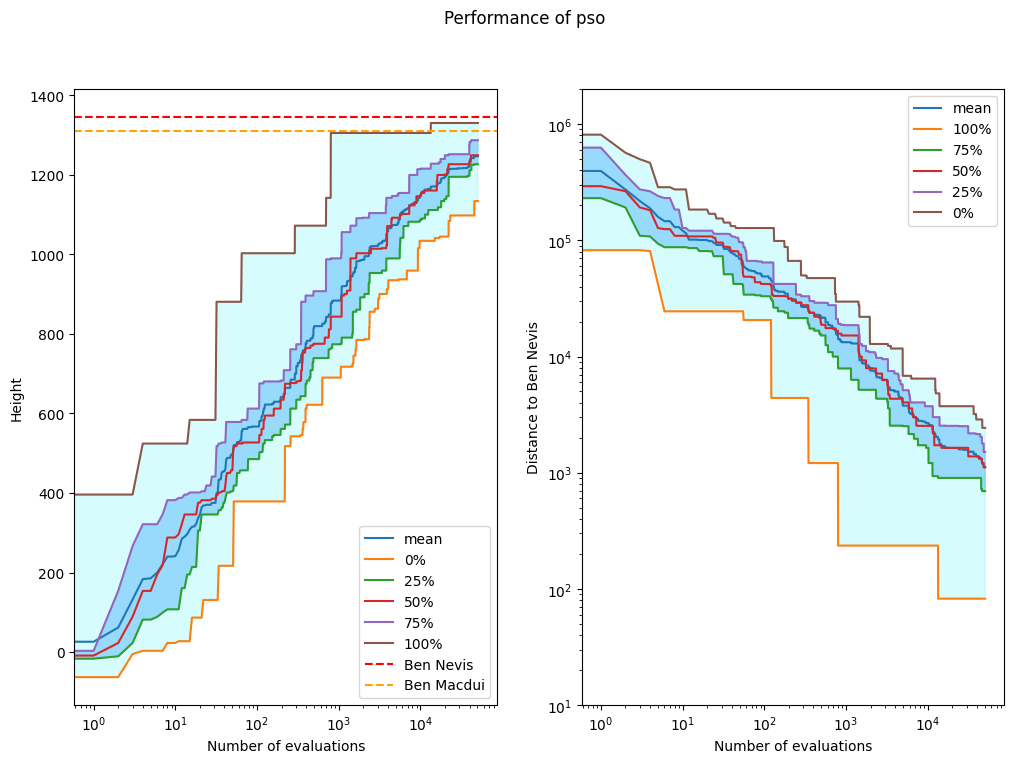

In [8]:
ins.plot_convergence_graph()

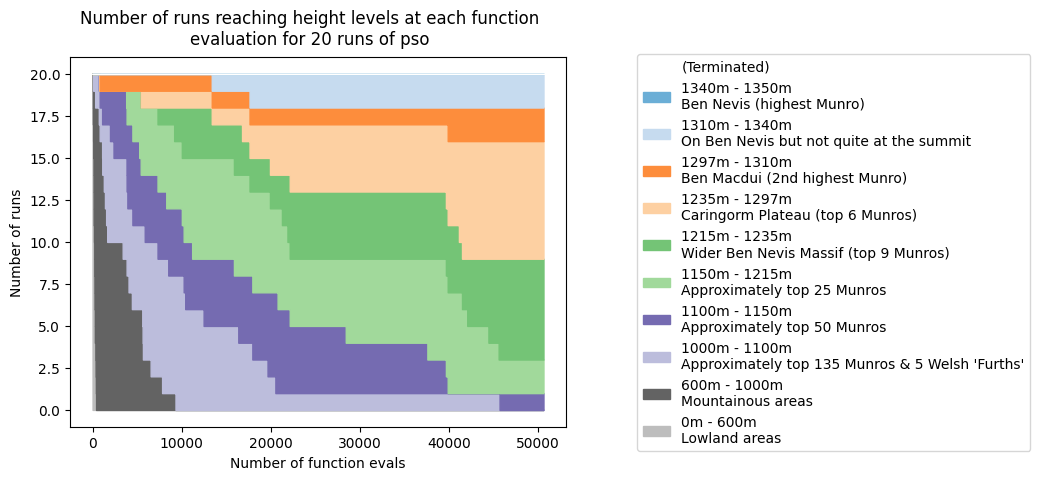

In [9]:
ins.plot_stacked_graph()

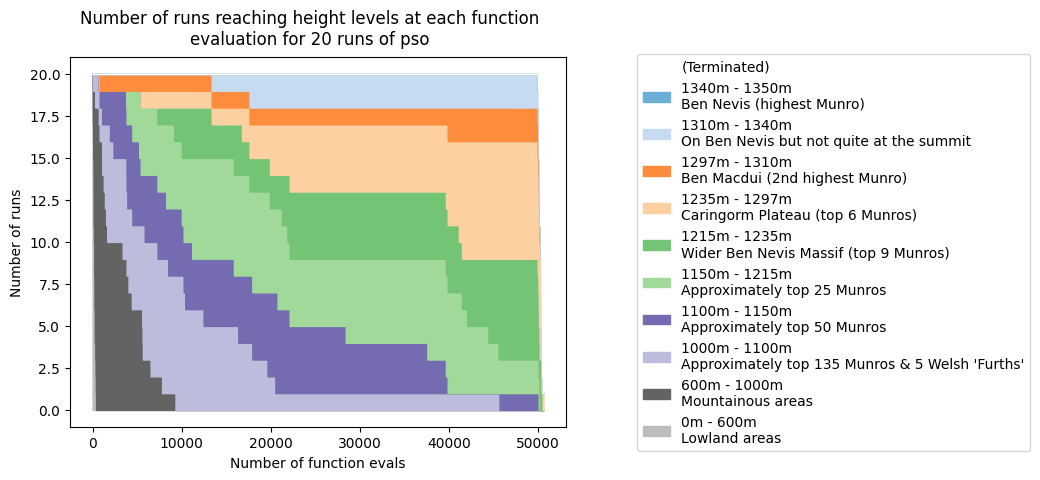

In [10]:
ins.plot_stacked_graph(mode='terminate')

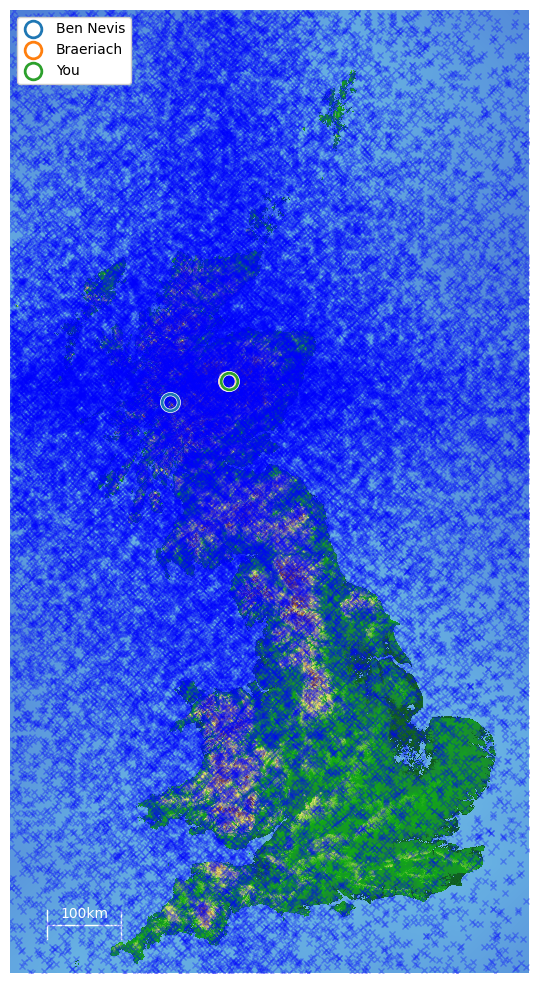

In [11]:
res = ins.results[4]
res.plot_global()

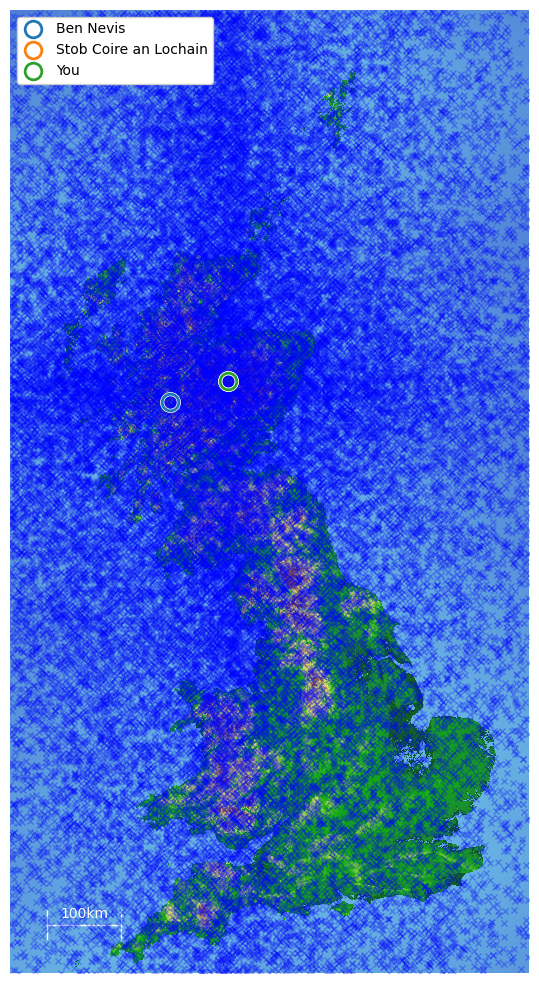

In [12]:
res = ins.results[3]
res.plot_global()